<b>Customer retention Analytics
Business Problem:</b>\
An International bank collected a sample data of 10,000 customers. They observed that some of their custimers are leaving or churning in an unusually high rate and they want to find understand and access why their customers keep leaving. They have hiered you as a data scientist to look into the data to give then some insight.


<b>Data:</b>\
The data was collected within the last 5 months, the feautures include the customer's name, creditscore, geography, gendey,age,tenure,balnce, number of products(accounts),credit card status(whether they have one or not), estimated salary, activity status(active member or not) and if the customer remained with them.

<b>Goal:</b>\
Your goal is to create a geodemographic segmentation to identify which of the customers have the highest risk of leaving.

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#importing the data
data = pd.read_csv("https://raw.githubusercontent.com/MavenCode/KubeflowTraining/master/Data/Telco/Churn_Modelling.csv")

In [ ]:
#viewing the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#re-check for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#data types check
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#dropping columns that are not needed
drop_df = data.drop(columns=['CustomerId','Surname','RowNumber'],axis=1)
drop_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#view unique features in Geograpy
drop_df['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
drop_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#Viewing the independent features
X = drop_df.iloc[:,:-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y = drop_df.iloc[:,-1:]
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
#use onehot encoder and label encoder for the categorical features
le = LabelEncoder()
ohe = OneHotEncoder()

X['Gender']= le.fit_transform(X['Gender'])
geo_df = pd.DataFrame(ohe.fit_transform(X[['Geography']]).toarray())

#getting feature name after onehotencoding
geo_df.columns = ohe.get_feature_names(['Geography'])

#merging geo_df with the main data
X = X.join(geo_df)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,France,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
X = X.drop(columns=['Geography'],axis=1)

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


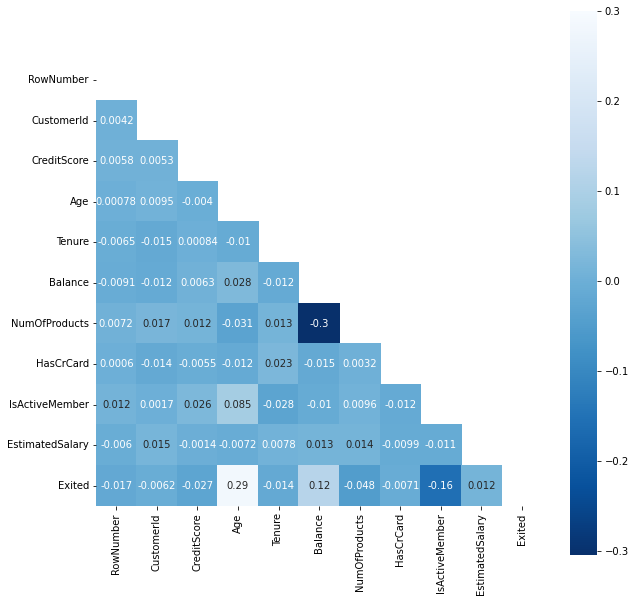

In [ ]:
#using heatmap see the correlation between each features
plt.figure(figsize=(10,10))
cor = data.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues_r,mask=mask, vmax=.3, square=True)
plt.show()


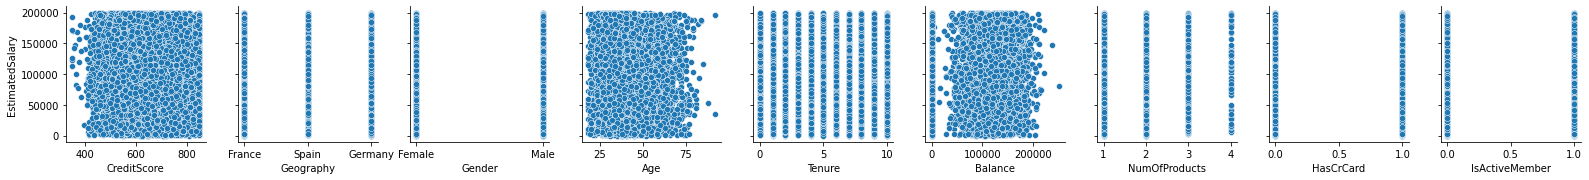

In [ ]:
sns.pairplot(data=drop_df,y_vars=['EstimatedSalary'], x_vars=['CreditScore','Geography','Gender','Age','Tenure',
             'Balance','NumOfProducts','HasCrCard','IsActiveMember'])

**Data** **spliting**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split( X,Y, test_size=0.2, random_state = 42)

In [ ]:
#Verify split
data_dict = {"X_train":X_train, "X_test":X_test, "y_train":Y_train, "y_test":Y_test}
for i in data_dict:
    print("The shape of {} is {}".format(i,data_dict[i].shape))

The shape of X_train is (8000, 12)
The shape of X_test is (2000, 12)
The shape of y_train is (8000, 1)
The shape of y_test is (2000, 1)


**MIN-MAX SCALER**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)
  

**Feature standardization**

In [ ]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#saving the values from the dataframe
y_train = Y_train.values

In [ ]:
#using keras sequential model
#initializing the classifier model with its input, hidden and output layers
classifier = Sequential()
classifier.add(Dense(units = 16, activation='relu', input_dim=12,))
classifier.add(Dense(units = 8, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

**Compiling the classifier model with Stochastic Gradient Descent**

In [ ]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy' , metrics =['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


**Fitting the classifier model**

In [ ]:
classifier.fit(X_train, y_train, batch_size=10 , epochs=50)

Epoch 1/50
800/800 [==============================] - 2s 1ms/step - loss: 0.5504 - accuracy: 0.7272
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8269
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3755 - accuracy: 0.8486
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3549 - accuracy: 0.8525
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3475 - accuracy: 0.8587
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3428 - accuracy: 0.8568
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3402 - accuracy: 0.8609
Epoch 8/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8605
Epoch 9/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3363 - accuracy: 0.8606
Epoch 10/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8611

**Getting the model's predictions on the test data**

In [ ]:
# These probabilities would help determine which of the customers have high risk of leaving the bank
y_pred = classifier.predict(X_test)
y_pred

array([[0.09040707],
       [0.00800392],
       [0.05274066],
       ...,
       [0.78113914],
       [0.1280826 ],
       [0.31744313]], dtype=float32)

In [ ]:
# create a threshold for the confution matrics
y_pred=(y_pred>0.5)
y_pred


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
countFalse =0
countTrue =0
for i in y_pred:
    if i[0] == False:
        countFalse += 1
    else:
        countTrue += 1
print("countF :{} and countT: {}".format(countFalse,countTrue))

countF :1708 and countT: 292


In [ ]:
# confusion metrics
cm = confusion_matrix(Y_test.values,y_pred)
print(cm)

[[1518   89]
 [ 190  203]]


** classification of confusion matrix result**
*   TN = 1533
*   TP =180

*   FN = 213
*   FP = 74





In [ ]:
#classification report
cr = classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.70      0.52      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

